In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np
import seaborn as sns

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Styles
sns.set_context('poster')
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


In [2]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
dfN1 = pd.read_csv("../resources/DataSujetos/N1_suj1.csv",header=None) 
# Preview the first 5 lines of the loaded data 
dfN1.head(10).T.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1.00000,0.85820,0.74820,0.69050,0.56056,0.50986,0.78675,0.67046,0.62666,0.51614
1,0.85820,1.00000,0.66561,0.70798,0.59563,0.58173,0.69447,0.71025,0.51457,0.50849
2,0.74820,0.66561,1.00000,0.78922,0.68111,0.52815,0.86555,0.71271,0.60522,0.55609
3,0.69050,0.70798,0.78922,1.00000,0.61537,0.73037,0.81926,0.93598,0.51765,0.61433
4,0.56056,0.59563,0.68111,0.61537,1.00000,0.72148,0.69519,0.62785,0.51788,0.70201
5,0.50986,0.58173,0.52815,0.73037,0.72148,1.00000,0.63407,0.80171,0.46359,0.78730
6,0.78675,0.69447,0.86555,0.81926,0.69519,0.63407,1.00000,0.84643,0.61158,0.63560
7,0.67046,0.71025,0.71271,0.93598,0.62785,0.80171,0.84643,1.00000,0.55326,0.69264
8,0.62666,0.51457,0.60522,0.51765,0.51788,0.46359,0.61158,0.55326,1.00000,0.57769
9,0.51614,0.50849,0.55609,0.61433,0.70201,0.78730,0.63560,0.69264,0.57769,1.00000


In [3]:
dfN1.tail(10).T.tail(10)

,106,107,108,109,110,111,112,113,114,115
106,1.00000,0.401070,0.25753,-0.203070,0.204960,0.248400,0.302830,0.18946,0.38049,0.247000
107,0.40107,1.000000,0.30388,0.104240,0.512350,0.553500,0.496140,0.48423,0.46456,-0.098602
108,0.25753,0.303880,1.00000,0.222630,0.330210,0.321810,0.249240,0.34512,0.35046,0.177560
109,-0.20307,0.104240,0.22263,1.000000,0.392660,0.205770,0.232360,0.38848,0.17795,-0.043363
110,0.20496,0.512350,0.33021,0.392660,1.000000,0.863420,0.755310,0.64722,0.34684,0.045225
111,0.24840,0.553500,0.32181,0.205770,0.863420,1.000000,0.815380,0.62090,0.37527,0.097037
112,0.30283,0.496140,0.24924,0.232360,0.755310,0.815380,1.000000,0.65382,0.43513,0.048907
113,0.18946,0.484230,0.34512,0.388480,0.647220,0.620900,0.653820,1.00000,0.73950,-0.136700
114,0.38049,0.464560,0.35046,0.177950,0.346840,0.375270,0.435130,0.73950,1.00000,-0.014520
115,0.24700,-0.098602,0.17756,-0.043363,0.045225,0.097037,0.048907,-0.13670,-0.01452,1.000000


In [4]:
dfLabels = pd.read_csv("../resources/aal_extended.csv",header=None) 
dfLabels.columns = ['reindex','name','mark','region','side']
dfLabels.head()


,reindex,name,mark,region,side
0,1,Precentral_L,2001,Central,L
1,2,Precentral_R,2002,Central,R
2,3,Frontal_Sup_L,2101,Frontal,L
3,4,Frontal_Sup_R,2102,Frontal,R
4,5,Frontal_Sup_Orb_L,2111,Frontal,L


In [5]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
dfW = pd.read_csv("../resources/DataSujetos/W_suj1.csv",header=None) 
# Preview the first 5 lines of the loaded data 
dfW.head(10).T.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1.00000,0.69976,0.61289,0.62648,0.59260,0.68651,0.68221,0.62131,0.56840,0.48871
1,0.69976,1.00000,0.42445,0.43383,0.41214,0.51148,0.40182,0.44451,0.29535,0.29000
2,0.61289,0.42445,1.00000,0.79685,0.54559,0.58222,0.82812,0.68815,0.42913,0.42463
3,0.62648,0.43383,0.79685,1.00000,0.57511,0.75537,0.75331,0.93048,0.45229,0.50021
4,0.59260,0.41214,0.54559,0.57511,1.00000,0.80216,0.56573,0.61385,0.62128,0.65266
5,0.68651,0.51148,0.58222,0.75537,0.80216,1.00000,0.63476,0.81506,0.62661,0.65909
6,0.68221,0.40182,0.82812,0.75331,0.56573,0.63476,1.00000,0.78582,0.57789,0.53122
7,0.62131,0.44451,0.68815,0.93048,0.61385,0.81506,0.78582,1.00000,0.54302,0.58846
8,0.56840,0.29535,0.42913,0.45229,0.62128,0.62661,0.57789,0.54302,1.00000,0.65405
9,0.48871,0.29000,0.42463,0.50021,0.65266,0.65909,0.53122,0.58846,0.65405,1.00000


In [6]:
dfN1.shape

(116, 116)

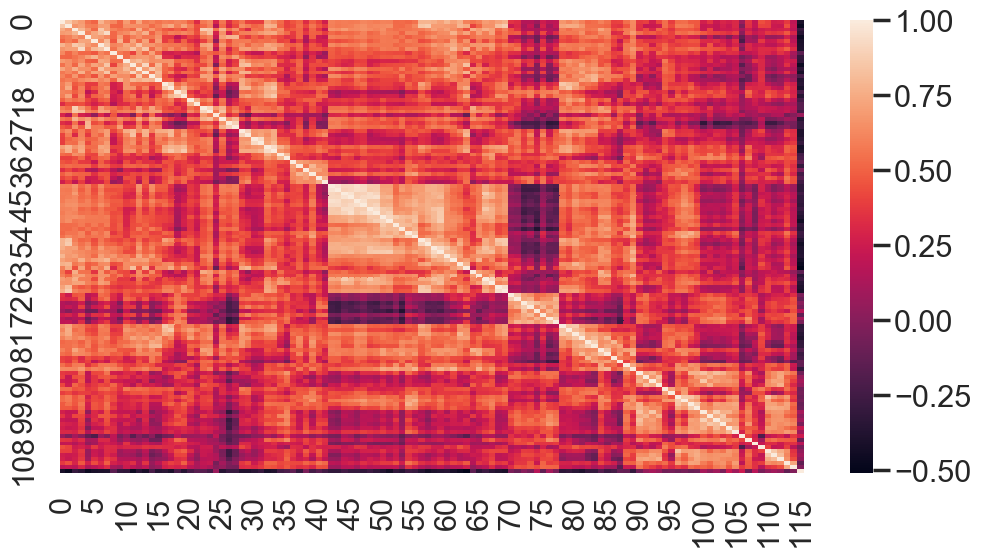

In [7]:
sns.heatmap(dfN1)

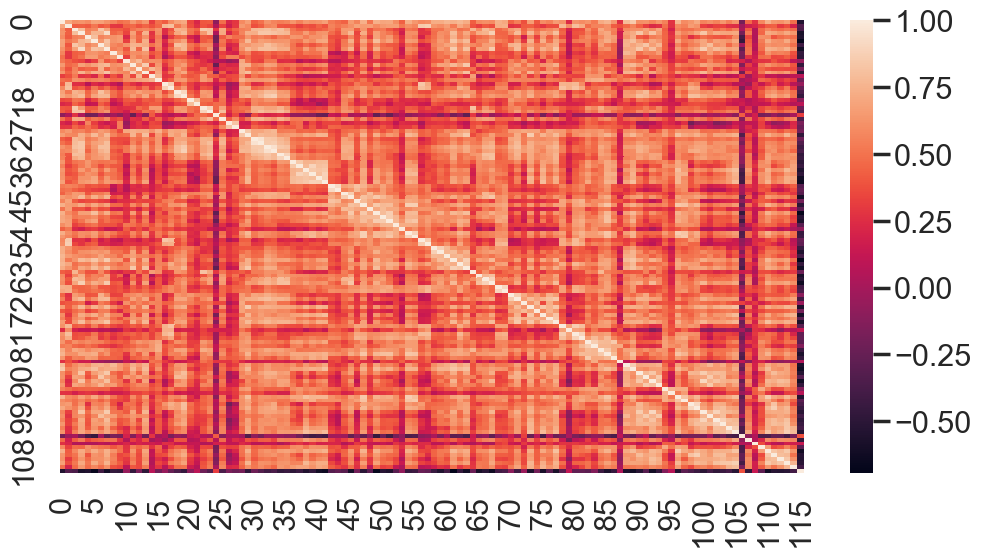

In [8]:
sns.heatmap(dfW)

In [9]:
dfWr = dfW.copy()
dfWr[dfWr>=0.3]=1
dfWr[dfWr<0.3]=0

dfW.sum().sum(),dfWr.sum().sum()

(6081.61000538, 10544.0)

In [10]:
#dfW[dfW>=.05]=1
#dfW[dfW<.05]=0
gN1 = nx.from_numpy_matrix(dfN1.values, create_using=nx.DiGraph)
gW = nx.from_numpy_matrix(dfW.values, create_using=nx.DiGraph)
node_attr = dfLabels.to_dict('index')
nx.set_node_attributes(gN1, node_attr)
nx.set_node_attributes(gW, node_attr)

In [11]:
def create_color_map(G, attribute, seaborn_palette="colorblind"):
    """Return a list of hex color mappings for node attributes"""
    attributes = [G.nodes[label][attribute] for label in G.nodes()]

    # get the set of possible attributes
    attributes_unique = list(set(attributes))
    num_values = len(attributes_unique)

    # generate color palette from seaborn
    palette = sns.color_palette(seaborn_palette, num_values).as_hex()

    # create a mapping of attribute to color
    color_map = dict(zip(attributes_unique, palette))

    # map the attribute for each node to the color it represents
    node_colors = [color_map[attribute] for attribute in attributes]

    return node_colors, color_map, palette


In [12]:
def plot_network(gW):
    elarge = [(u, v) for (u, v, d) in gW.edges(data=True) if d["weight"] >= 0.6]
    esmall = [(u, v) for (u, v, d) in gW.edges(data=True) if d["weight"] <= -0.6]

    pos = nx.spring_layout(gW,k=0.00001,iterations=5,seed=943381)  # positions for all nodes

    # nodes
    node_colors, color_map, palette = create_color_map(gW, 'region')
    nx.draw_networkx_nodes(gW, pos, node_size=100, node_color=node_colors,)

    # edges
    nx.draw_networkx_edges(gW, pos, edgelist=elarge, width=.5)
    nx.draw_networkx_edges(
        gW, pos, edgelist=esmall, width=0.5, alpha=0.5, edge_color="b", style="dashed"
    )

    # labels
    nx.draw_networkx_labels(gW, pos, font_size=6, font_family="sans-serif")

    plt.axis("off")
    plt.show()
    # legend
    print(color_map)
    sns.palplot(palette)


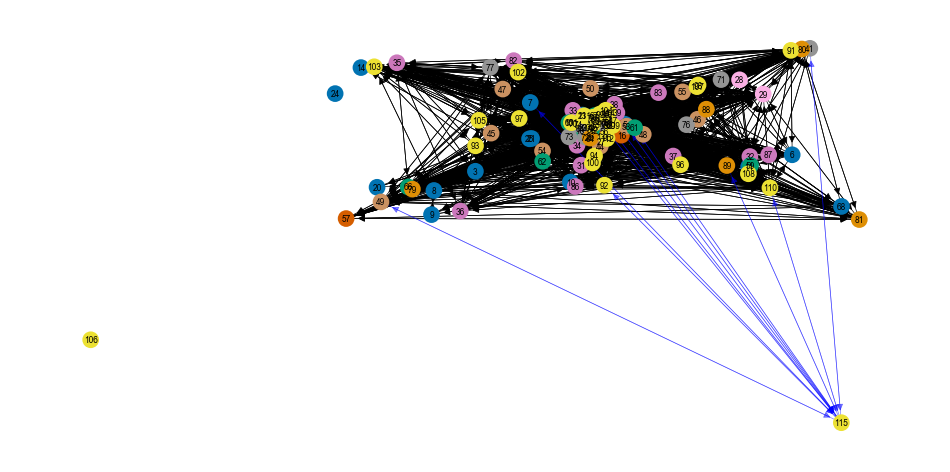

{'Frontal': '#0173b2', 'Temporal': '#de8f05', 'Parietal': '#029e73', 'Central': '#d55e00', 'Limbic': '#cc78bc', 'Occipital': '#ca9161', 'Insula': '#fbafe4', 'Subcortical': '#949494', 'Cerebelum': '#ece133'}


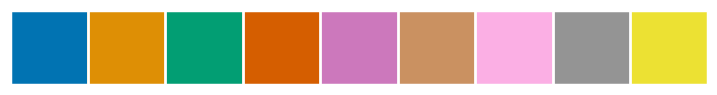

In [13]:
plot_network(gW)

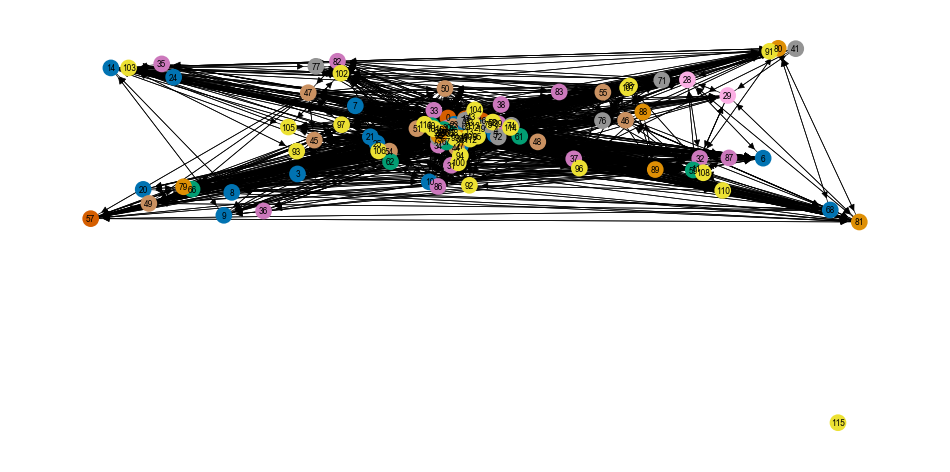

{'Frontal': '#0173b2', 'Temporal': '#de8f05', 'Parietal': '#029e73', 'Central': '#d55e00', 'Limbic': '#cc78bc', 'Occipital': '#ca9161', 'Insula': '#fbafe4', 'Subcortical': '#949494', 'Cerebelum': '#ece133'}


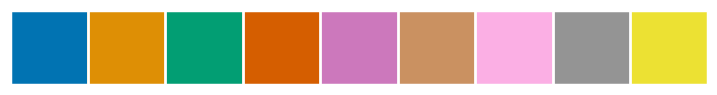

In [14]:
plot_network(gN1)